In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [99]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Load DataSet

In [100]:
crime_df = pd.read_csv(r"C:\Users\AA\DataScience\datasets\US_violent_crime.csv")
crime_df.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [101]:
crime_df.shape

(50, 5)

Here we have 50 rows and 5 columns

In [102]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [103]:
crime_df.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

We calculate min, max, standard deviation, mean, and quartiles . We should now check for missing values.

# Checking for missing values

In [104]:
crime_df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

There are no missing values

In [105]:
crime_df = crime_df.rename(columns={'Unnamed: 0':'State'})
crime_df.head()

State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

As the column name unnamed :0 doesn't make sense we renamed it to 'State'

# Now performing Exploratory Data Analysis(EDA):

# 1. Murder Rate

<Axes: xlabel='State'>

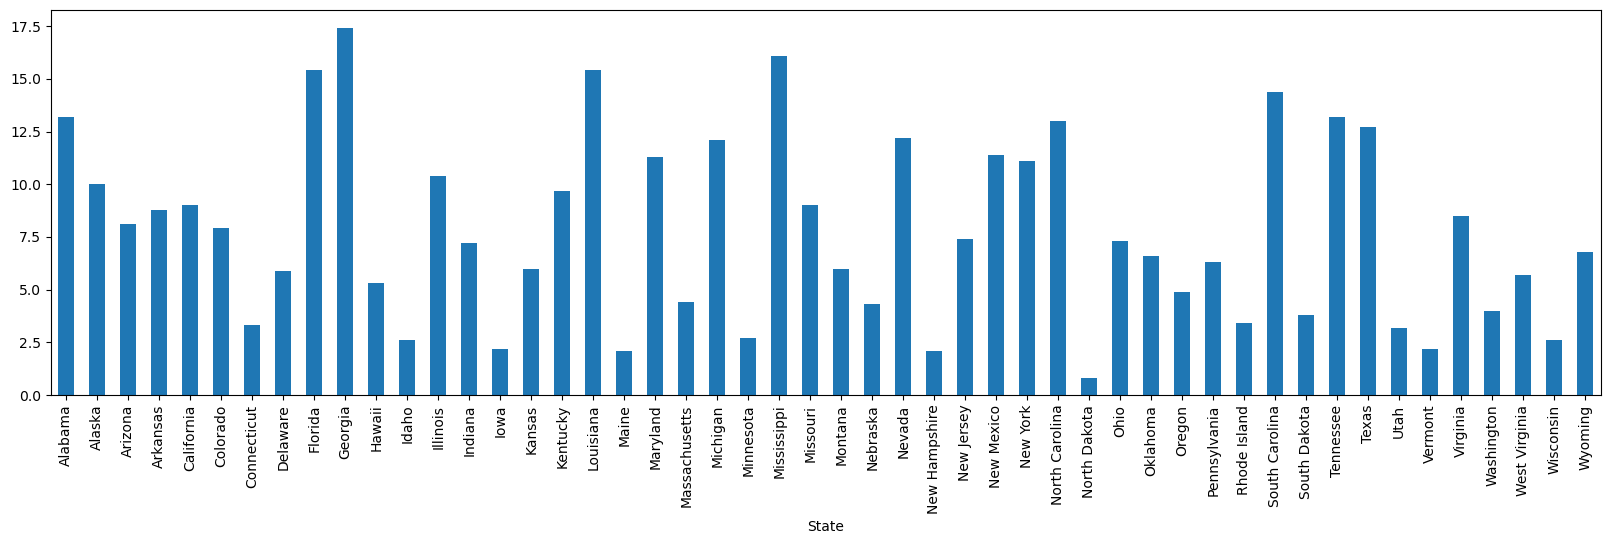

In [106]:
plt.figure(figsize=(20,5))
crime_df.groupby('State')['Murder'].max().plot(kind='bar')

We observe that, 
HIGHEST RATE: GRORGIA,MISSISSIPPI, followed by FLORIDA and KENTUCKY whereas
LOWEST RATE: NORTH DAKOTA, IDAHO, IOWA, MAINE, NEW HAMPSHIRE

# 2. Assault Rate 

<Axes: xlabel='State'>

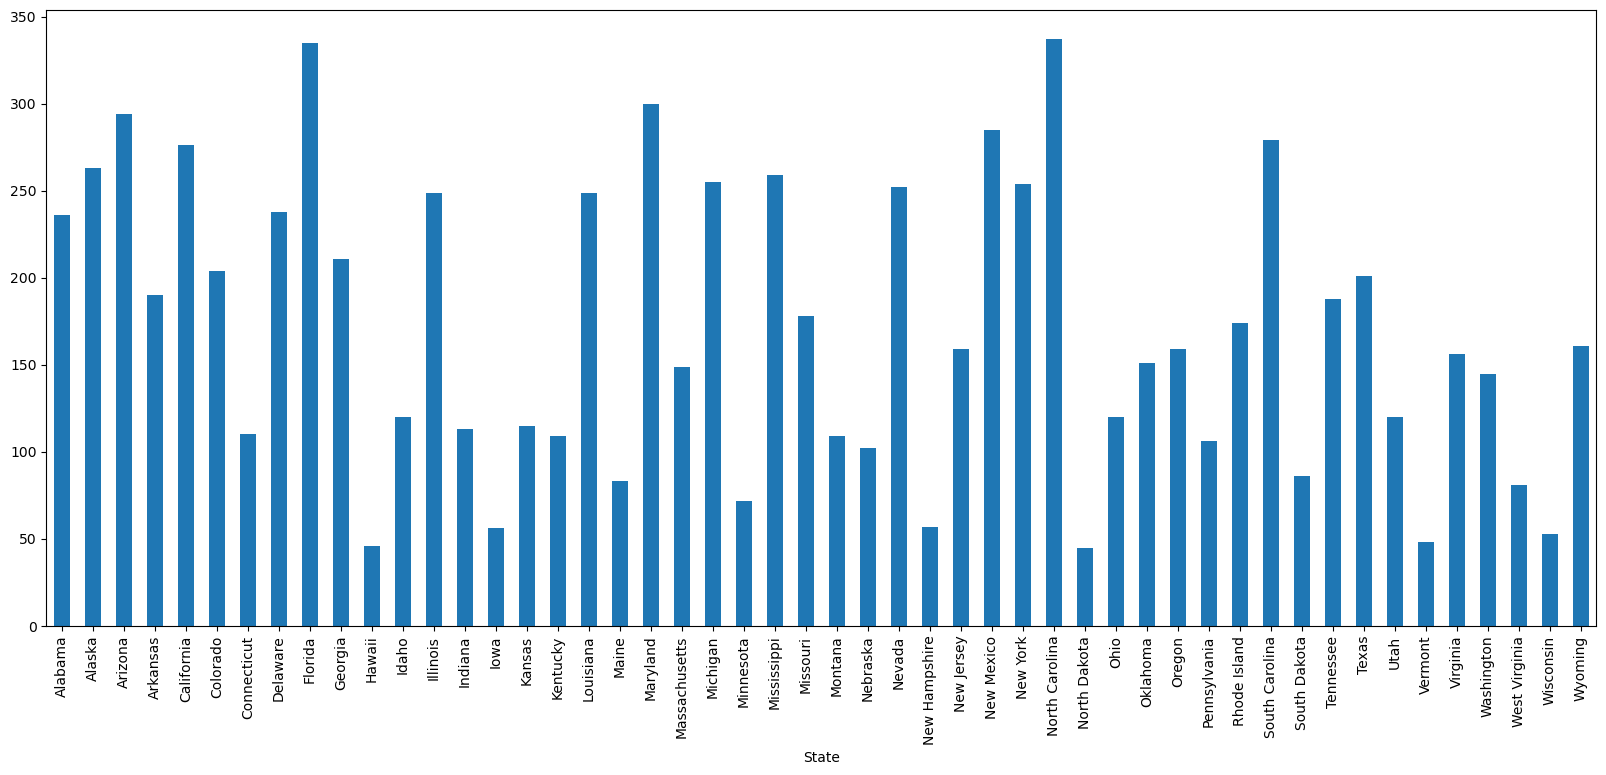

In [107]:
plt.figure(figsize=(20,8))
crime_df.groupby('State')['Assault'].max().plot(kind='bar')

Assult rate is higher in FLORIDA and NORTH CAROLINA
and lower in states like HAWAII, NORTH DAKOTA

# 3. UrbanPop Rate

<Axes: xlabel='State'>

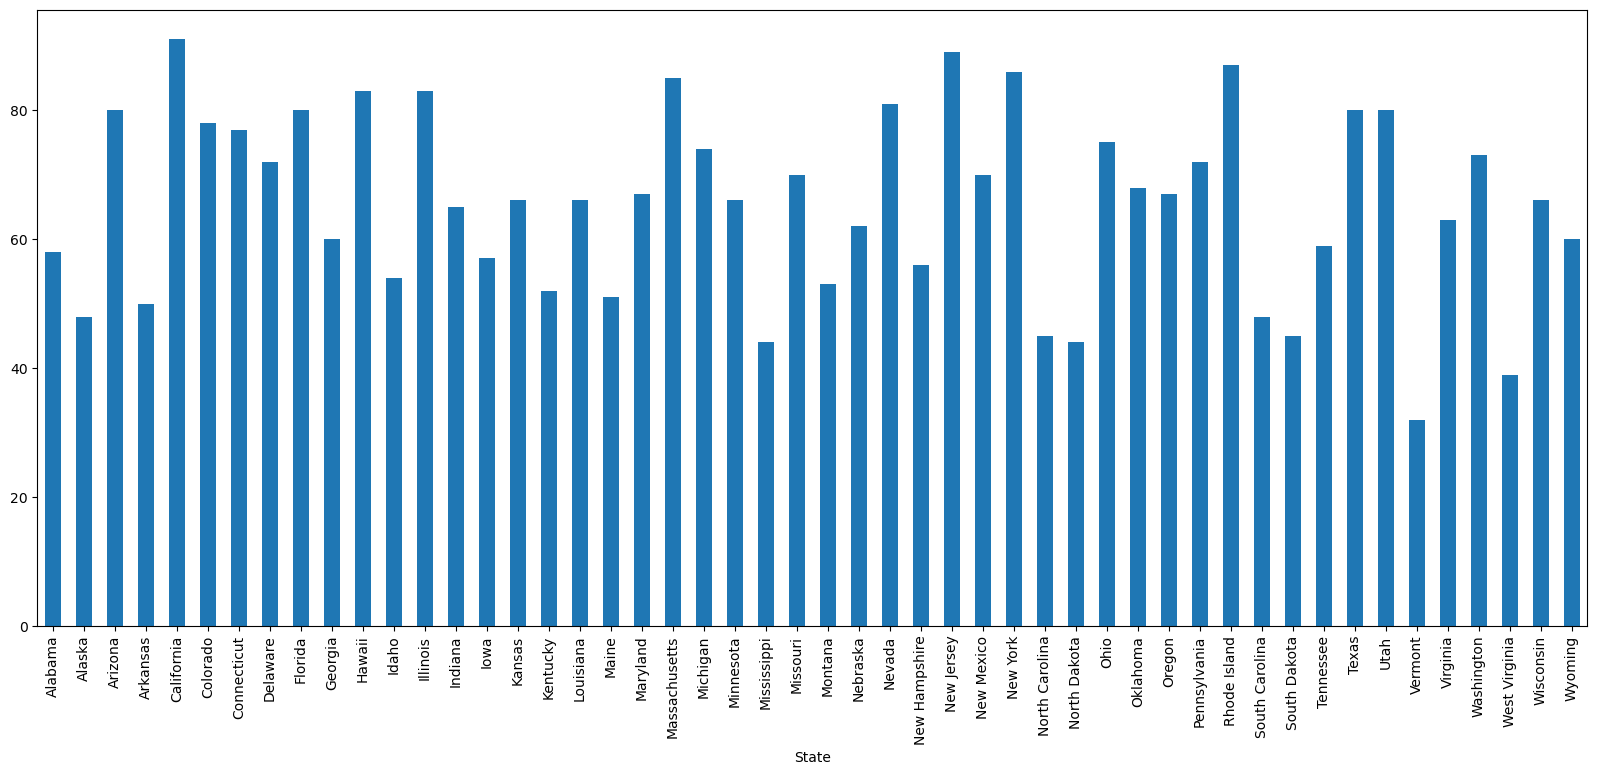

In [108]:
plt.figure(figsize=(20,8))
crime_df.groupby('State')['UrbanPop'].max().plot(kind='bar')

COLORADO holds the max rate and VERMONT with the lower rate

# 3. Rape Rate

<Axes: xlabel='State'>

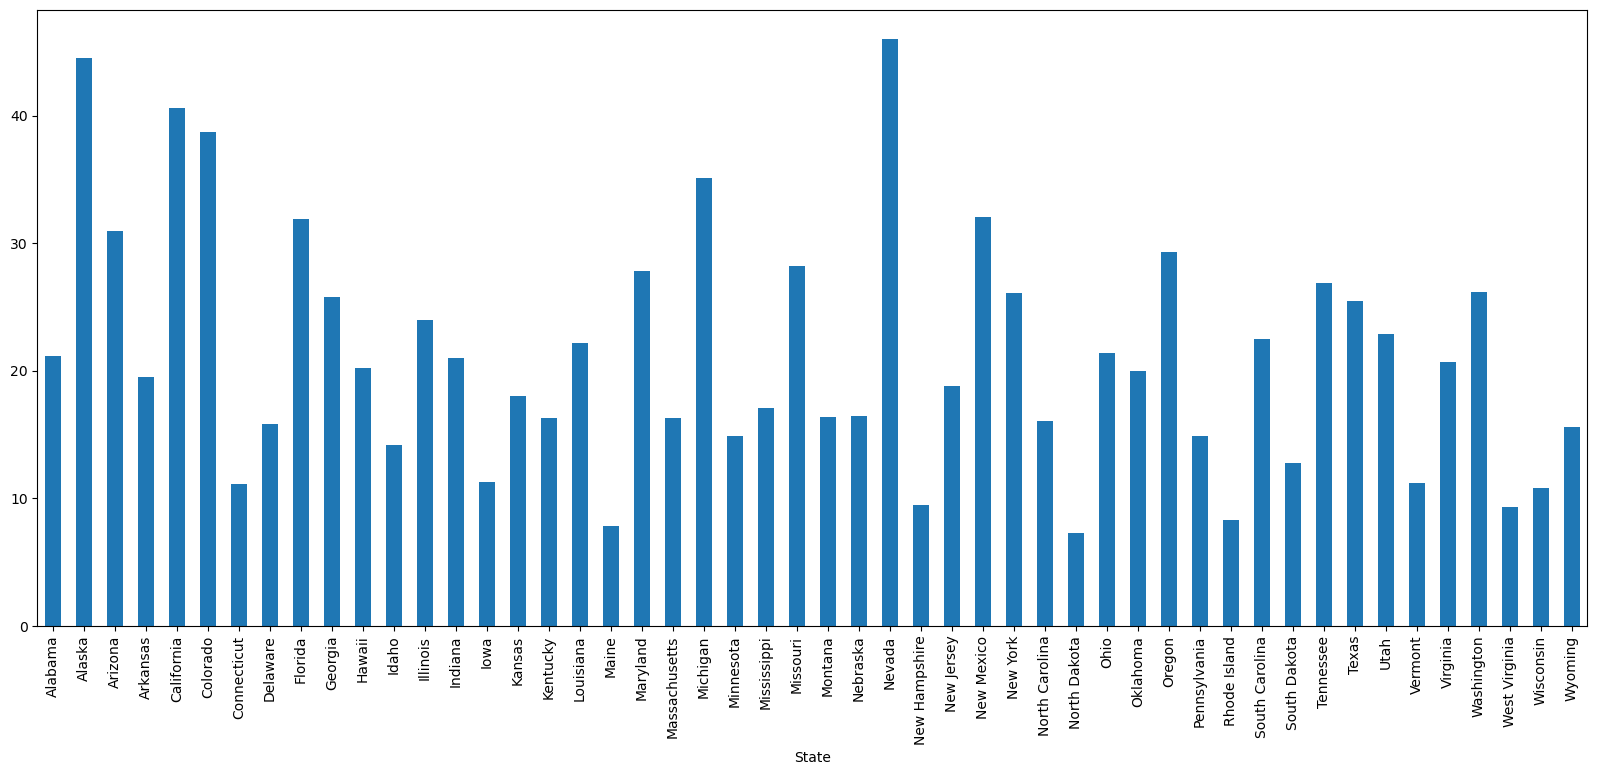

In [109]:
plt.figure(figsize=(20,8))
crime_df.groupby('State')['Rape'].max().plot(kind='bar')

NEVADA and ALASKA holds the max rate for rape while state like MAINE, NORTH DAKOTA  holds the lowest one

In [110]:
data = crime_df.iloc[:,1:].values
data

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [111]:
scaled_data = scaler.fit_transform(data)
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

Fit: The fit part involves calculating the mean and standard deviation (or other parameters depending on the scaler type) from the data. This information is used to normalize or standardize the data.

Transform: The transform part applies the scaling transformation to the dataset. It subtracts the mean and divides by the standard deviation (for StandardScaler). The result is a scaled version of your original data.

# Types of Linkages:

# a. Single Linkage
The minimum distance between any two points in the different cluster.

Text(0, 0.5, 'Euclidean Distance')

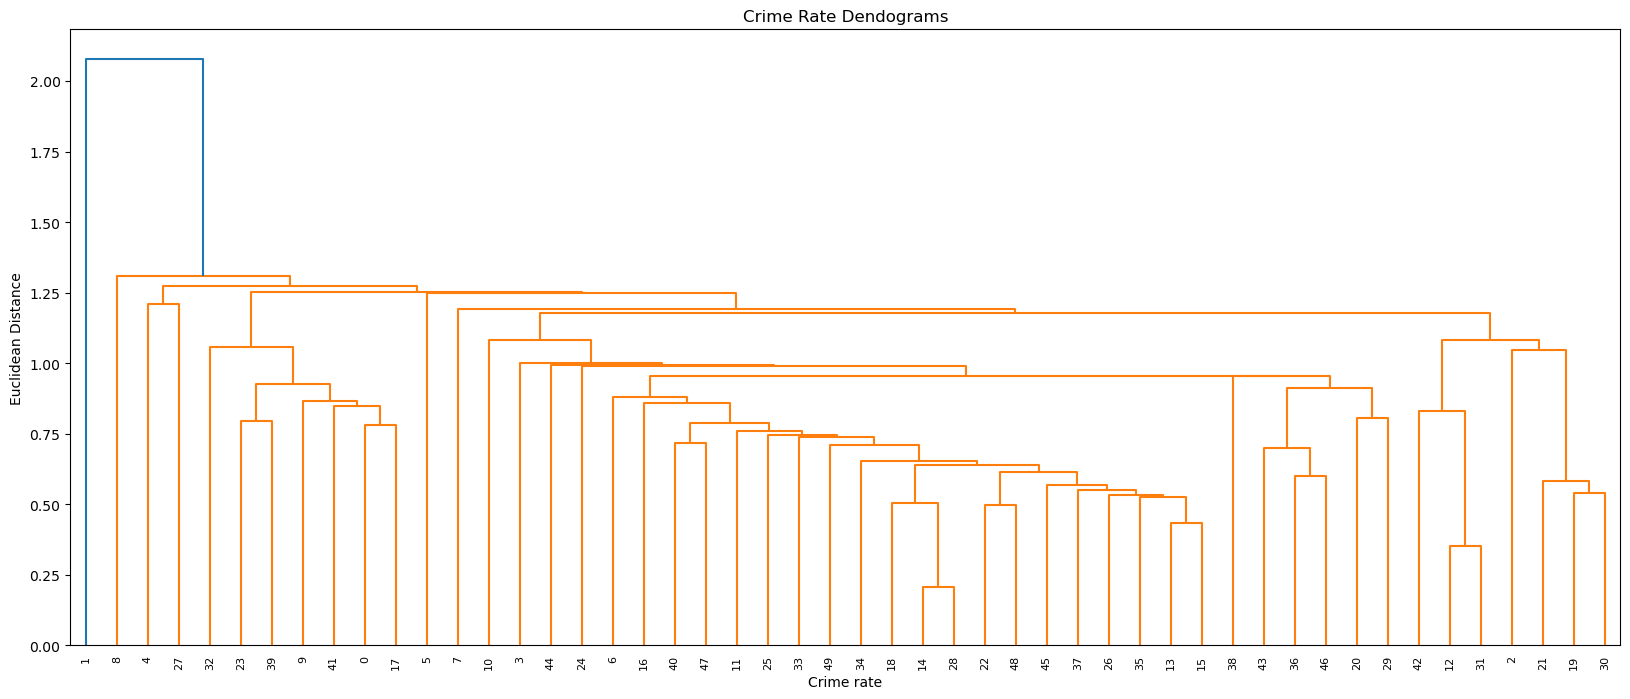

In [112]:
plt.figure(figsize=(20,8))
plt.title("Crime Rate Dendograms")
dendo = sch.dendrogram(sch.linkage(scaled_data,method = 'single'))
plt.xlabel('Crime rate')
plt.ylabel('Euclidean Distance')

# b. Complete Linkage

The maximum distance between two points in different cluster. 

Text(0, 0.5, 'Euclidean Distance')

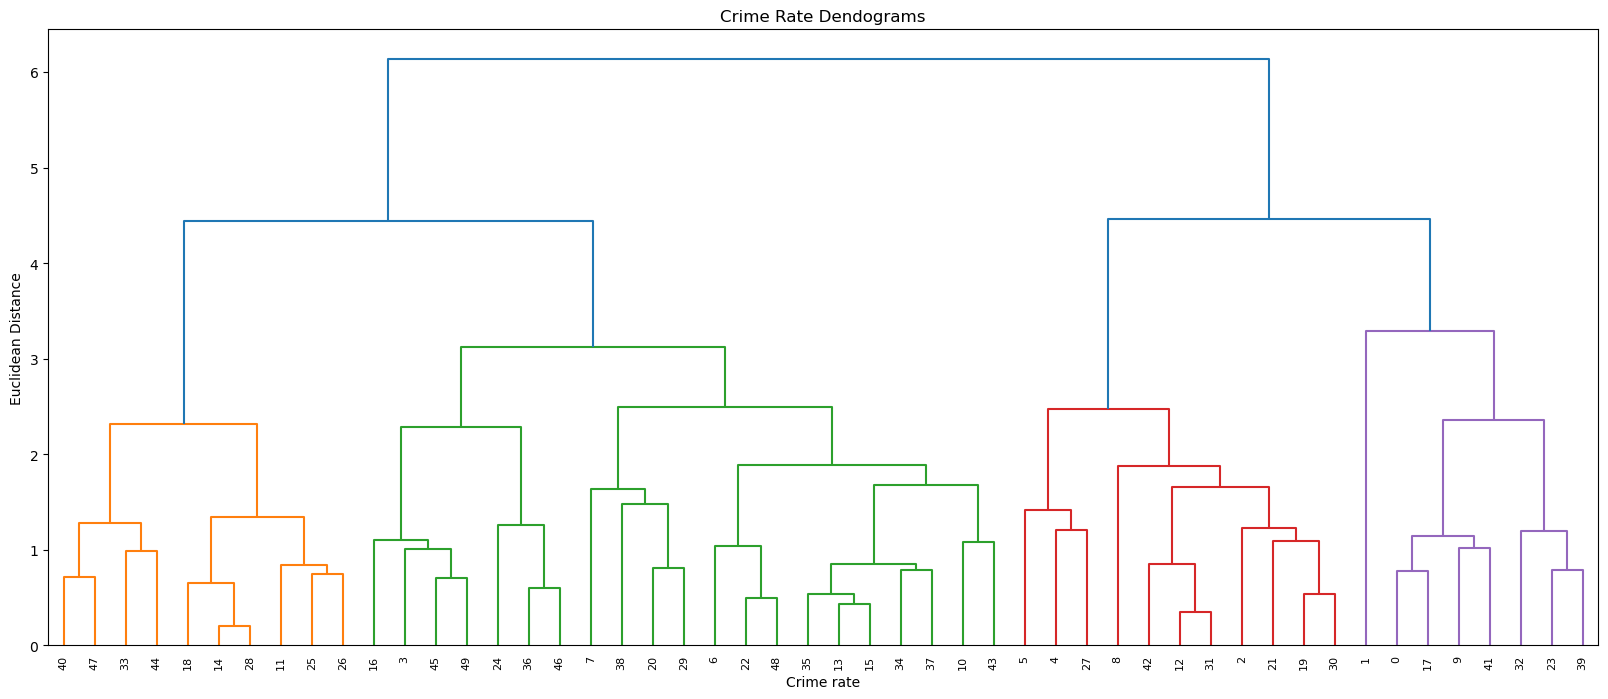

In [113]:
plt.figure(figsize=(20,8))
plt.title("Crime Rate Dendograms")
dendo = sch.dendrogram(sch.linkage(scaled_data,method = 'complete'))
plt.xlabel('Crime rate')
plt.ylabel('Euclidean Distance')

# c. Average Linkage
The average distance between all pairs of point in different cluster

Text(0, 0.5, 'Euclidean Distance')

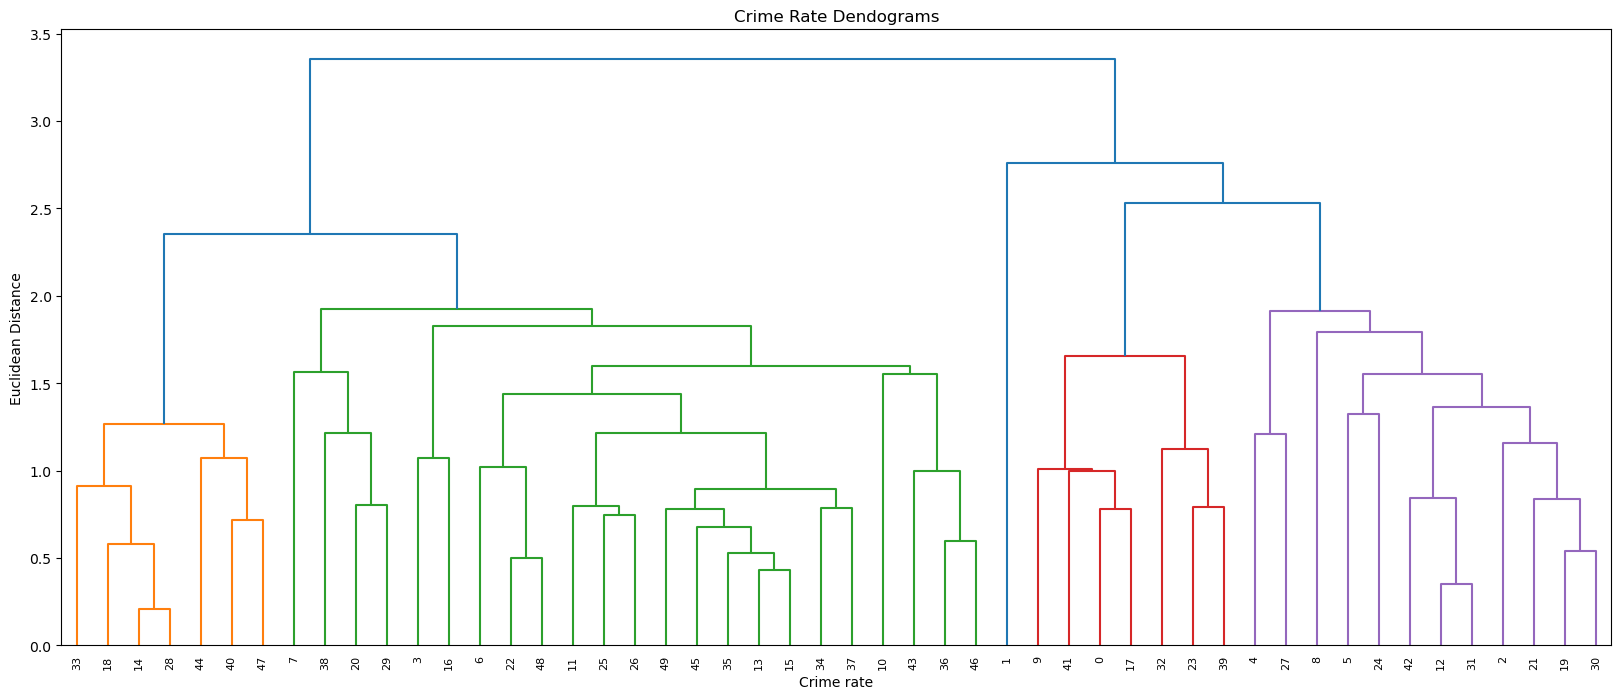

In [114]:
plt.figure(figsize=(20,8))
plt.title("Crime Rate Dendograms")
dendo = sch.dendrogram(sch.linkage(scaled_data,method = 'average'))
plt.xlabel('Crime rate')
plt.ylabel('Euclidean Distance')

# d. Ward Methods
The increase in the variance for the merged cluster compared to the individual clusters. It is actually a method that tries to minimize the variance within each cluster.

Text(0, 0.5, 'Euclidean Distance')

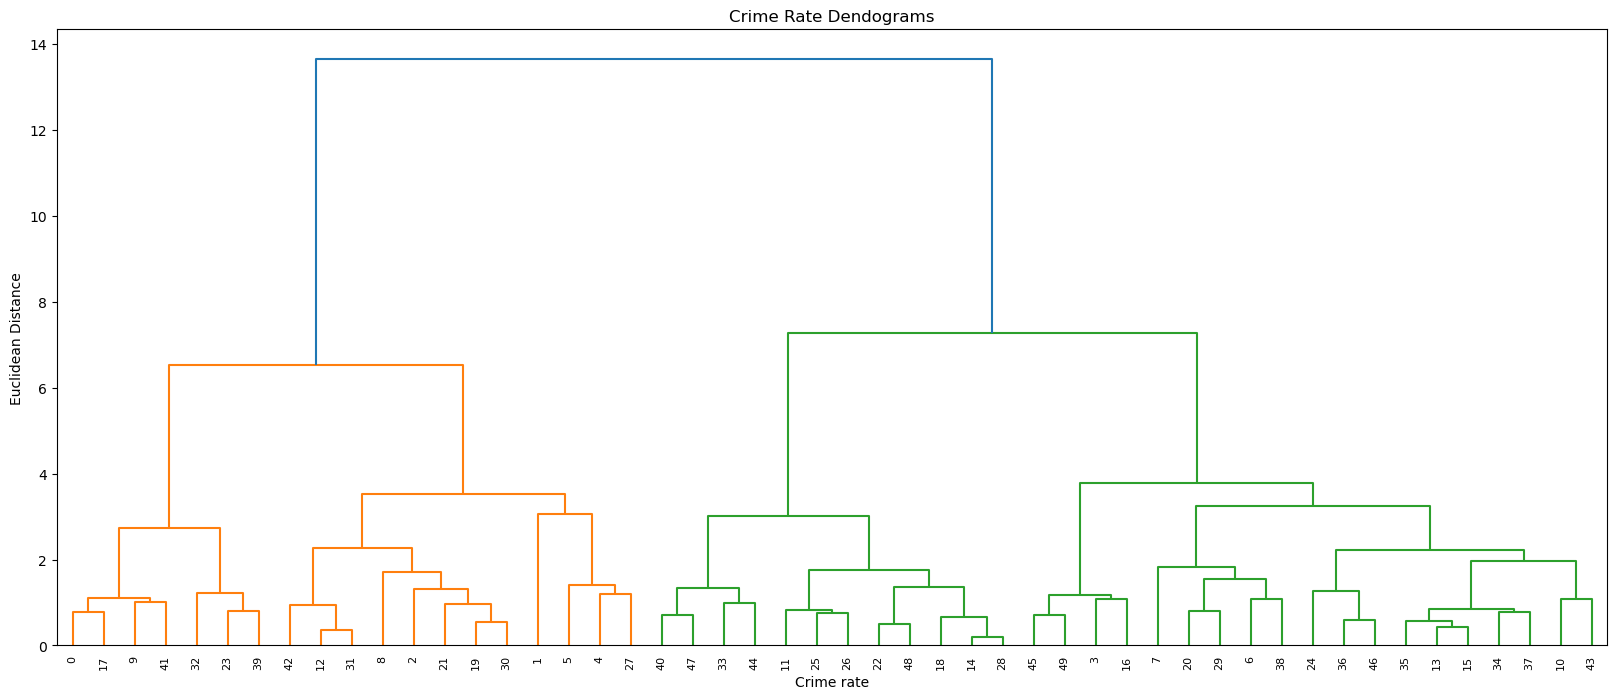

In [115]:
plt.figure(figsize=(20,8))
plt.title("Crime Rate Dendograms")
dendo = sch.dendrogram(sch.linkage(scaled_data,method = 'ward'))
plt.xlabel('Crime rate')
plt.ylabel('Euclidean Distance')

In [116]:
#Fit the Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [117]:
y_pred=ac.fit_predict(data)
y_pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [118]:
#fetch the cluster labels
crime_df['Cluster labels']= y_pred
crime_df.head()

State  Murder  Assault  UrbanPop  Rape  Cluster labels
0     Alabama    13.2      236        58  21.2               1
1      Alaska    10.0      263        48  44.5               1
2     Arizona     8.1      294        80  31.0               1
3    Arkansas     8.8      190        50  19.5               2
4  California     9.0      276        91  40.6               1

In [119]:
crime_df

State  Murder  Assault  UrbanPop  Rape  Cluster labels
0          Alabama    13.2      236        58  21.2               1
1           Alaska    10.0      263        48  44.5               1
2          Arizona     8.1      294        80  31.0               1
3         Arkansas     8.8      190        50  19.5               2
4       California     9.0      276        91  40.6               1
5         Colorado     7.9      204        78  38.7               2
6      Connecticut     3.3      110        77  11.1               0
7         Delaware     5.9      238        72  15.8               1
8          Florida    15.4      335        80  31.9               1
9          Georgia    17.4      211        60  25.8               2
10          Hawaii     5.3       46        83  20.2               0
11           Idaho     2.6      120        54  14.2               0
12        Illinois    10.4      249        83  24.0               1
13         Indiana     7.2      113        65  21.0               0
14            Iowa     2.2       56        57  11.3               0
15          Kansas     6.0      115        66  18.0               0
16        Kentucky     9.7      109        52  16.3               0
17       Louisiana    15.4      249        66  22.2               1
18           Maine     2.1       83        51   7.8               0
19        Maryland    11.3      300        67  27.8               1
20   Massachusetts     4.4      149        85  16.3               2
21        Michigan    12.1      255        74  35.1               1
22       Minnesota     2.7       72        66  14.9               0
23     Mississippi    16.1      259        44  17.1               1
24        Missouri     9.0      178        70  28.2               2
25         Montana     6.0      109        53  16.4               0
26        Nebraska     4.3      102        62  16.5               0
27          Nevada    12.2      252        81  46.0               1
28   New Hampshire     2.1       57        56   9.5               0
29      New Jersey     7.4      159        89  18.8               2
30      New Mexico    11.4      285        70  32.1               1
31        New York    11.1      254        86  26.1               1
32  North Carolina    13.0      337        45  16.1               1
33    North Dakota     0.8       45        44   7.3               0
34            Ohio     7.3      120        75  21.4               0
35        Oklahoma     6.6      151        68  20.0               2
36          Oregon     4.9      159        67  29.3               2
37    Pennsylvania     6.3      106        72  14.9               0
38    Rhode Island     3.4      174        87   8.3               2
39  South Carolina    14.4      279        48  22.5               1
40    South Dakota     3.8       86        45  12.8               0
41       Tennessee    13.2      188        59  26.9               2
42           Texas    12.7      201        80  25.5               2
43            Utah     3.2      120        80  22.9               0
44         Vermont     2.2       48        32  11.2               0
45        Virginia     8.5      156        63  20.7               2
46      Washington     4.0      145        73  26.2               2
47   West Virginia     5.7       81        39   9.3               0
48       Wisconsin     2.6       53        66  10.8               0
49         Wyoming     6.8      161        60  15.6               2

In [120]:
#state in their respective cluster
crime_df[['State','Cluster labels']]

State  Cluster labels
0          Alabama               1
1           Alaska               1
2          Arizona               1
3         Arkansas               2
4       California               1
5         Colorado               2
6      Connecticut               0
7         Delaware               1
8          Florida               1
9          Georgia               2
10          Hawaii               0
11           Idaho               0
12        Illinois               1
13         Indiana               0
14            Iowa               0
15          Kansas               0
16        Kentucky               0
17       Louisiana               1
18           Maine               0
19        Maryland               1
20   Massachusetts               2
21        Michigan               1
22       Minnesota               0
23     Mississippi               1
24        Missouri               2
25         Montana               0
26        Nebraska               0
27          Nevada               1
28   New Hampshire               0
29      New Jersey               2
30      New Mexico               1
31        New York               1
32  North Carolina               1
33    North Dakota               0
34            Ohio               0
35        Oklahoma               2
36          Oregon               2
37    Pennsylvania               0
38    Rhode Island               2
39  South Carolina               1
40    South Dakota               0
41       Tennessee               2
42           Texas               2
43            Utah               0
44         Vermont               0
45        Virginia               2
46      Washington               2
47   West Virginia               0
48       Wisconsin               0
49         Wyoming               2

<Axes: xlabel='Cluster labels', ylabel='Murder'>

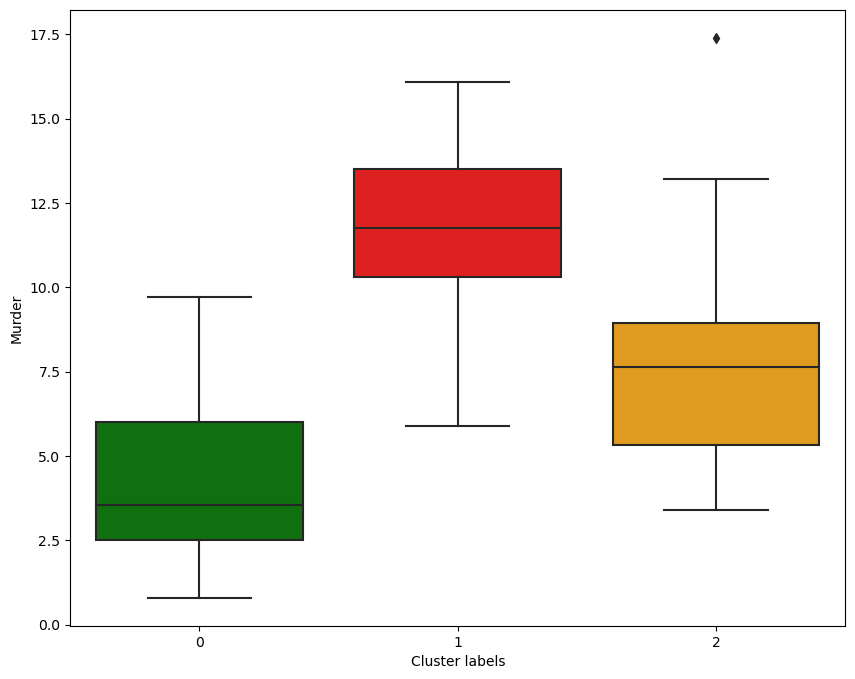

In [122]:
custom_palette = ['green', 'red', 'orange']
plt.figure(figsize=(10,8))
sns.boxplot(x='Cluster labels', y='Murder', data=crime_df, palette=custom_palette)

<Axes: xlabel='Cluster labels', ylabel='Assault'>

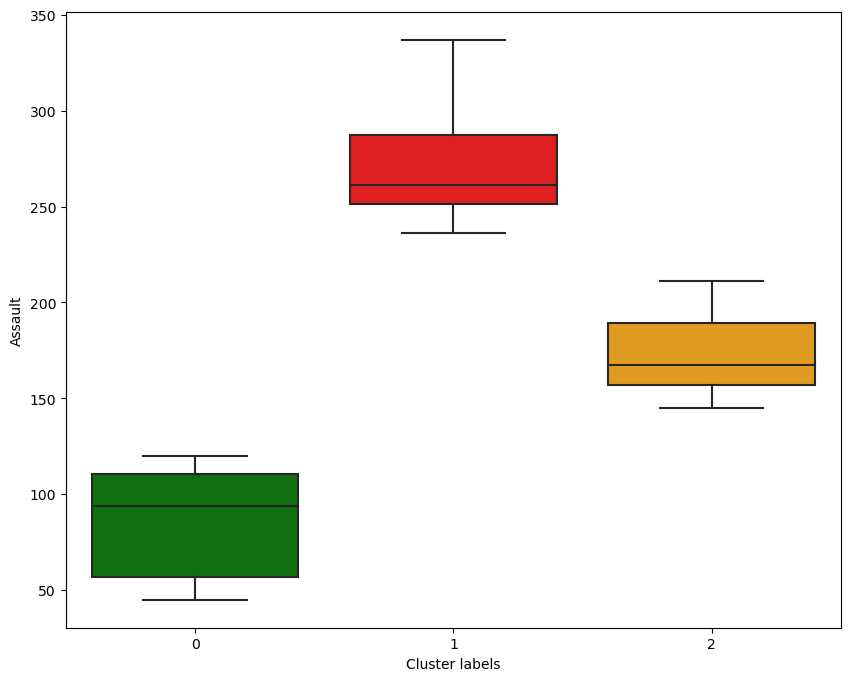

In [127]:
custom_palette = ['green', 'red', 'orange']
plt.figure(figsize=(10,8))
sns.boxplot(x='Cluster labels', y='Assault', data=crime_df, palette=custom_palette)

<Axes: xlabel='Cluster labels', ylabel='UrbanPop'>

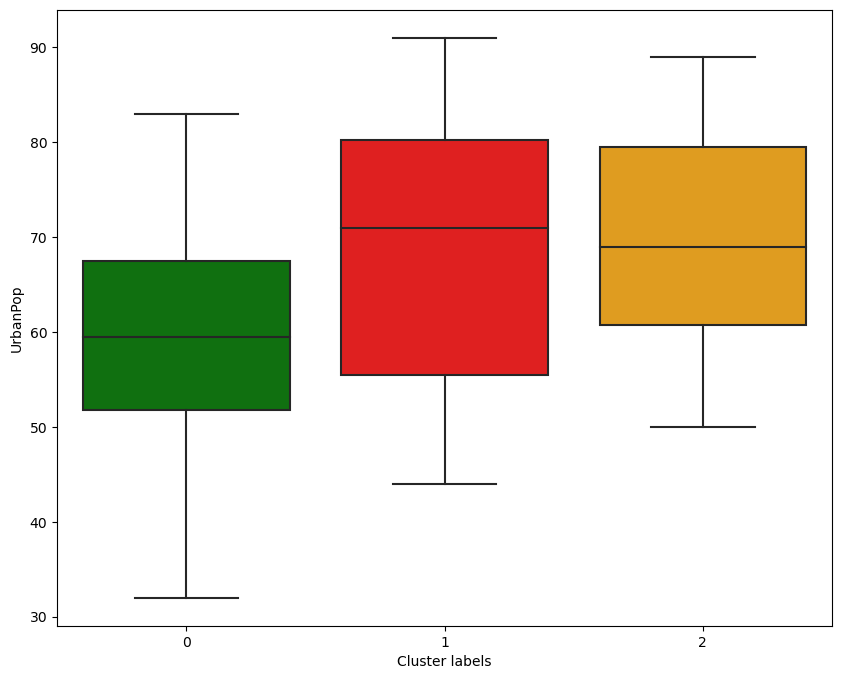

In [128]:
custom_palette = ['green', 'red', 'orange']
plt.figure(figsize=(10,8))
sns.boxplot(x='Cluster labels', y='UrbanPop', data=crime_df, palette=custom_palette)

<Axes: xlabel='Cluster labels', ylabel='Rape'>

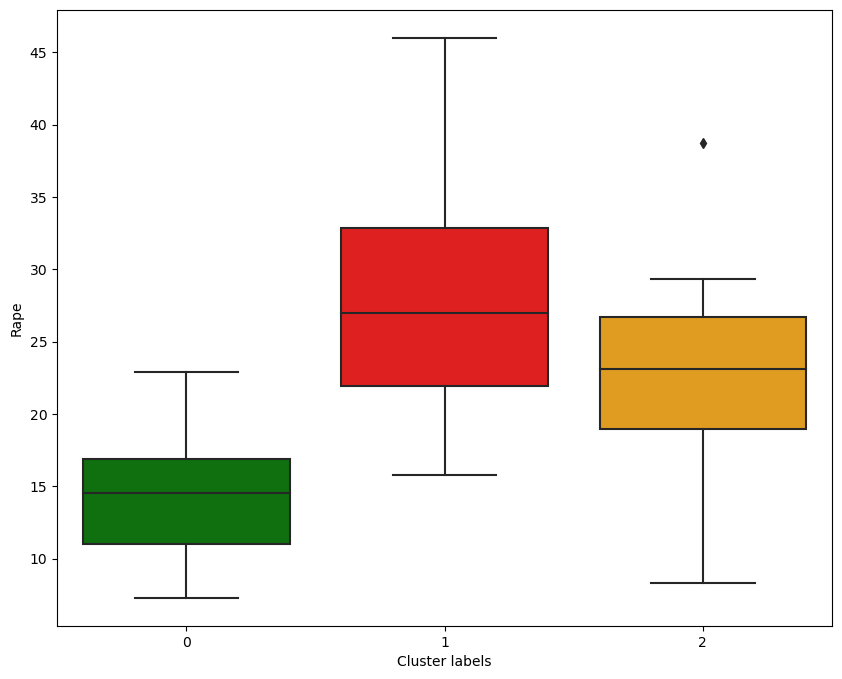

In [124]:
custom_palette = ['green', 'red', 'orange']
plt.figure(figsize=(10,8))
sns.boxplot(x='Cluster labels', y='Rape', data=crime_df, palette=custom_palette)

The CITIES in their respective zones are as follows:

In [129]:
safe_zone = crime_df.groupby('Cluster labels')['State'].unique()[0]
safe_zone

array(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania',
       'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [130]:
danger_zone = crime_df.groupby('Cluster labels')['State'].unique()[1]
danger_zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware',
       'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
       'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina'], dtype=object)

In [134]:
moderate_zone = crime_df.groupby('Cluster labels')['State'].unique()[2]
moderate_zone

array(['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri',
       'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee',
       'Texas', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

# Scatter plot based on the danger level cluster of cities

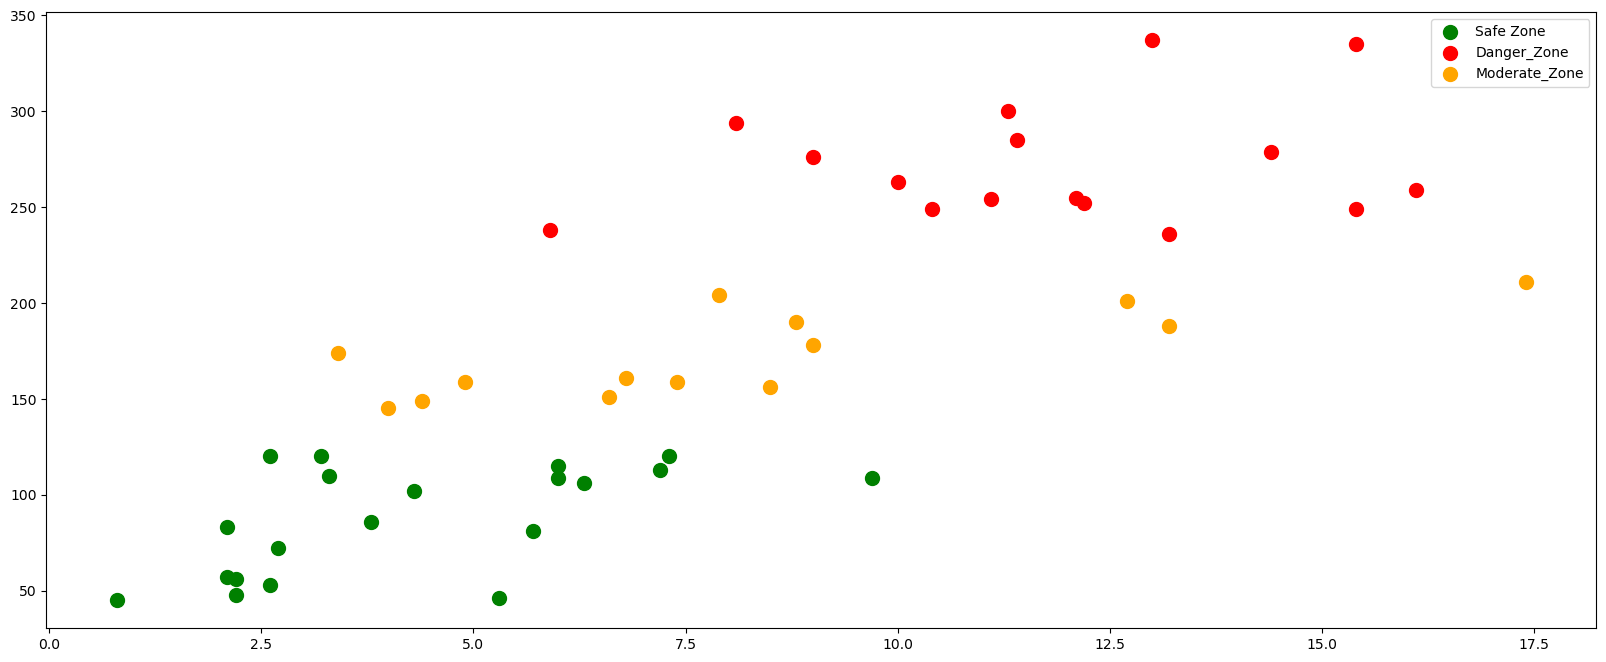

In [135]:
plt.figure(figsize=(20,8))
plt.scatter(data[y_pred==0,0], data[y_pred==0,1], s=100, c='green', label='Safe Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='red', label ='Danger_Zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='orange', label ='Moderate_Zone')
plt.legend()
plt.show()